In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
metadata = pd.DataFrame(columns=["name", "id", "alt"])
data = {}
zipfs = os.listdir("data2")
for zipf in zipfs:
    accs = zipfile.ZipFile("data2/"+zipf, "r")
    # Metadata
    f = accs.open("Metadaten.csv")
    meta = pd.read_csv(f, sep=";", encoding = "ISO-8859-1")
    f.close()
    entry = pd.DataFrame({"name":meta.Wert[meta.Metadatum=="Messstellenname"].to_list(),
                          "id":meta.Wert[meta.Metadatum=="Messstellennummer"].to_list(),
                          "alt":meta.Wert[meta.Metadatum=="Geländehöhe"].to_list()})
    metadata = metadata.append(entry)
    # Data
    f = accs.open(accs.filelist[2])
    tmp = pd.read_csv(f, sep=";", encoding = "ISO-8859-1", decimal=",")
    tmp["Datum"] = pd.to_datetime(tmp.Datum, format="%d.%m.%Y")
    tmp = tmp[["Datum", "Wasserstand [mNHN]"]]
    tmp.columns = ["date", "level"]
    tmp = tmp.set_index("date")
    data[int(entry.id.to_list()[0])] = tmp   
    f.close()
    accs.close()   

/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_26980/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [3]:
len(metadata)
#pd.DataFrame.rolling()

75

In [4]:
metadata["id"] = metadata.id.astype("int")

In [5]:
import geopandas as gpd

In [6]:
locs = pd.read_csv("locs.csv", sep=";", keep_default_na=False)
locs = gpd.GeoDataFrame(locs, geometry=gpd.points_from_xy(locs.lon, locs.lat), crs="EPSG:4326")
locs = locs.set_index("id")
locs["diff"] = 0.
locs

,name,stock,lat,lon,select,geometry,diff
id,,,,,,,
35432326,"Eiche, Ehrenpfortenberg",MP,52.409555,12.983906,1,POINT (12.98391 52.40955),0.0
35442254,"Potsdam, Drachenhaus",,52.404405,13.024878,1,POINT (13.02488 52.40440),0.0
35432600,"Golm, ca. 1 km nördlich",,52.417704,12.968078,1,POINT (12.96808 52.41770),0.0
35442256,"Potsdam, Orangerie",,52.406874,13.028701,1,POINT (13.02870 52.40687),0.0
35442250,"Bornstedt, Eichenallee",OP,52.408920,13.027767,1,POINT (13.02777 52.40892),0.0
...,...,...,...,...,...,...,...
36432281,"Geltow, Am Pappeltor",UP,52.365671,12.966061,0,POINT (12.96606 52.36567),0.0
35442123,"Seeburg, ca. 1,2 km südl.",,52.495665,13.123412,1,POINT (13.12341 52.49567),0.0
36441987,"Pdm.-Bbg., Dianapark",OP,52.388155,13.122832,1,POINT (13.12283 52.38815),0.0


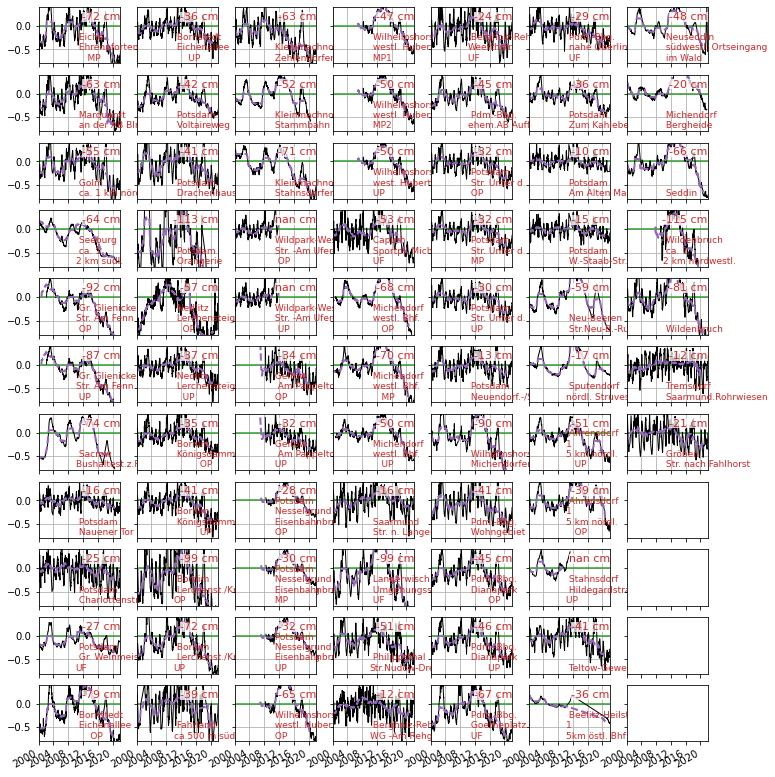

In [7]:
fig, ax = plt.subplots(11,7, figsize=(12,15), sharex=True, sharey=True)
ax = ax.ravel(order="F")
keys= list(data.keys())
keys.sort()
for i, key in enumerate(keys):
    plt.sca(ax[i])
    avglevel= data[key].loc["2002-01-01":"2012-01-01","level"].mean()
    plt.axhline(y=0, color="tab:green")
    ax[i].plot(data[key].index, data[key].level-avglevel, lw=1, color="black")
    ax[i].plot(data[key].index-dt.timedelta(days=500), 
               data[key].rolling("1000d").median().level-avglevel, lw=2, ls="--", color="tab:purple")
#plt.xlim(dt.datetime(2020,1,1), pd.datetime.now())
    plt.ylim(-0.8,0.4)
    plt.grid()
    plt.xlim(dt.datetime(2000,1,1),dt.datetime(2022,2,1))
    title=""
    for item in metadata[metadata.id==key].name.to_list()[0].split(",")[1:]:
        title = title + item+"\n"
    title.strip()
    plt.text(dt.datetime(2010,1,1), -1, title, color="tab:red", fontsize=9,
             horizontalalignment="left", verticalalignment="bottom")
    curlevel= data[key].loc["2020-01-01":"2022-01-01","level"].mean()
    diff = (curlevel-avglevel)*100
    locs.loc[key,"diff"] = diff
    
    t = plt.text(dt.datetime(2022,1,1), 0.3, "%.0f cm" % diff,
             horizontalalignment="right", verticalalignment="top", color="tab:red", fontsize=11)
    t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None', pad=0))

fig.autofmt_xdate()
#plt.tight_layout()
plt.savefig("gw-potsdam.pdf", dpi=300)

In [8]:
water = gpd.read_file("geo/gewaesser.shp")
water = water.to_crs(epsg=25832)
build = gpd.read_file("geo/buildings.shp")
build = build.to_crs(epsg=25832)
gmd = gpd.read_file("geo/gemeinden.shp")

In [9]:
locs = locs.to_crs(epsg=25832)

In [10]:
left, right, bottom, top = locs.bounds.minx.min(), locs.bounds.maxx.max(), locs.bounds.miny.min(), locs.bounds.maxy.max()

In [11]:
import numpy as np

In [ ]:
water[water.fclass==wetland]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
water.plot(ax=ax)
water[water.fclass=="wetland"].plot(ax=ax, edgecolor="None", facecolor="lightsteelblue")
build.plot(ax=ax, edgecolor="None", facecolor="grey")
gmd.plot(ax=ax, facecolor="None", edgecolor="black")
goodstock = np.array(locs.select==1) #np.in1d(locs.stock, ["", "OP", "UF"])
tmp = locs[(locs["diff"] <= -75) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="tab:red", mec="black", ms=10, alpha=0.8, label="> 75 cm")
tmp = locs[(locs["diff"] > -75) & (locs["diff"] <= -50) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="tab:orange", mec="black", ms=10, alpha=0.8, label="50-75 cm")
tmp = locs[(locs["diff"] > -50) & (locs["diff"] <= -25) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="lemonchiffon", mec="black", ms=10, alpha=0.8, label="25-50 cm")
plt.plot(locs[goodstock].geometry.x, locs[goodstock].geometry.y, "ko", mfc="None", mec="black", ms=10, label="< 25 cm")
lg = plt.legend(loc="upper right", title = "Anomalie 'heute' ggb. 2002-2012")
#locs.plot("diff", ax=ax)
buf=2000
plt.xlim(left-buf, right+buf)
plt.ylim(bottom-buf, top+buf)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("gw-spatial.pdf", dpi=300, bbox_inches="tight")

## Folium mapping

In [13]:
import folium

In [36]:
m = folium.Map(location=[52.398918177440855, 13.069219988189971], zoom_start=11, tiles="Stamen Terrain")

In [37]:
goodstock = np.array(locs.select==1) #np.in1d(locs.stock, ["", "OP", "UF"])

In [38]:
tmp = locs[(locs["diff"] <= -75) & goodstock]
for i in tmp.index:    
    folium.CircleMarker(
        location=[tmp.loc[i,"lat"], tmp.loc[i,"lon"]],
        radius=5,
        popup=tmp.loc[i,"name"],
        color="#cb4335",
        fill=True,
        fill_color="#cb4335",
    ).add_to(m)

In [39]:
m

In [16]:
m.save("index.html")